In [1]:
import pandas as pd
import numpy as np

##### 1

##### 2

##### 3

##### 4

#### Intro

Even though a tree is a type of graph, trees and graphs are considered different topics when it comes to algorithm problems. Because graphs are the more advanced/difficult topic, we will start by looking at trees.

The nodes of a graph are also called vertices, and the pointers that connect them are called edges. In graphical representations, nodes/vertices are usually represented with circles and the edges are lines/arrows that connect the circles (we saw this in the linked lists chapter).

In a linked list, a node's pointer pointed to the next node. In a tree, a node has pointers to its children. If a node A is pointing to a node B, then B is a child of A, and A is the parent of B. The root is the only node that has no parent. Note that in a tree, a node cannot have more than one parent.

So what makes a binary tree "binary"? In a binary tree, all nodes have a maximum of two children. These children are referred to as the left child and the right child. Note that there isn't really a difference between a child being on the left or the right, it's just the convention used to refer to the children and convenient for graphical representations.

To summarize, a binary tree is a collection of nodes. Every node has between 0 to 2 children, and every node except the root has exactly one parent.

Just like with a linked list, binary trees are implemented using objects of a custom class. This is the typical class definition that will be provided to you in algorithm problems:

In [25]:
class TreeNode:
    def __init__(self, val, left, right):
        self.val = val
        self.left = left
        self.right = right

In binary tree problems, you will be given a reference to the root of a binary tree as the input. You can access the root's left subtree with root.left and the root's right subtree with root.right. Like with linked lists, each node will also carry a value val as data. In a linked list, the tail (last node) has its next pointer as null. In a binary tree, if a node does not have a left child, then node.left will be null, and vice-versa with the right child. Remember that if both children are null, then the node is a leaf.

In [ ]:
#traverse a linked list
def get_sum(head):
    ans = 0
    while head:
        ans += head.val
        head = head.next
    
    return ans

For each node, there is a moment in the code execution where the head variable is referencing the node. We traverse by using the .next attribute.

Traversing a binary tree follows the same idea. We start at the root and traverse by using the child pointers .left and .right. When traversing linked lists, we usually do it iteratively. With binary trees, we usually do it recursively.

#### Depth First Search (DFS) Traversal

In a DFS, we prioritize depth by traversing as far down the tree as possible in one direction (until reaching a leaf node) before considering the other direction. For example, let's say we choose left as our priority direction. We move exclusively with node.left until the left subtree has been fully explored. Then, we explore the right subtree.

DFS chooses a branch and goes as far down as possible. Once it fully explores the branch, it backtracks until it finds another unexplored branch.

Because we need to backtrack up the tree after reaching the end of a branch, DFS is typically implemented using recursion, although it is also sometimes done iteratively using a stack. Here is a simple example of recursive DFS to visit every node:

Each call to dfs(node) is visiting that node. As you can see in the code, we visit the left child before visiting the right child.

In [2]:
################################################ See Video ################################################################## 

# Each call to dfs(node) is visiting that node. 
# As you can see in the code, we visit the left child before visiting the right child.


def dfs(node):
    if node == None:
        return

    dfs(node.left)
    dfs(node.right)
    return


# The good news is that the structure for performing a DFS is very similar across all problems. It goes as follows:

#     1. Handle the base case(s). Usually, an empty tree (node = null) is a base case.
#     2. Do some logic for the current node
#     3. Recursively call on the current node's children
#     4. Return the answer


The most important thing to understand when it comes to solving binary tree problems is that each function call solves and returns the answer to the original problem as if the subtree rooted at the current node was the input. The logic that will be done at each call (step 2) will depend on the problem.

We mentioned that there are three types of DFS. Each of the three types differs only in the order that they execute steps 2/3.

    The name of each traversal is describing when the current node's logic is performed.

    Pre -> before children

    In -> in the middle of children

    Post -> after children


In [28]:
#Bulding a binary tree
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

"""
The following code builds a tree that looks like:
    0
  /   \
 1     2
"""

root = TreeNode(0)
one = TreeNode(1)
two = TreeNode(2)

root.left = one
root.right = two

print(root.left.val)
print(root.right.val)

1
2


##### Traverse a tree, maximum depth

In [4]:
#Understand that root, one, two, three, four, five, six are objects of the Class TreeNode
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(0)
one = TreeNode(1)
two = TreeNode(2)
three = TreeNode(3)
four = TreeNode(4)
five = TreeNode(5)
six = TreeNode(6)

root.left = one
root.right = two

one.left = three
one.right = four

two.right = five

five.right = six

"""
The above code builds a tree that looks like:
       0
     /   \
    1     2
  /  \     \
 3    4     5
             \
              6

"""





print(root.left.val)
print(root.right.val)


1
2


In [2]:
root.left.left.val

3

In [90]:
# Different Tree traversals techniques

# In preorder traversal, logic is done on the current node before moving to the children. 
# Let's say that we wanted to just print the value of each node in the tree to the console. 
# In that case, at any given node, we would print the current node's value,
# then recursively call the left child, then recursively call the right child.

"""
The ex tree looks like:
       0
     /   \
    1     2
  /  \     \
 3    4     5
             \
              6

"""
def preorder_dfs(node):
    #base case if no node in a tree
    if not node:
        return

    print(node.val)
    preorder_dfs(node.left)
    preorder_dfs(node.right)
    return
preorder_dfs(root)

0
1
3
4
2
5
6


In [91]:
# For inorder traversal, we first recursively call the left child, then perform logic (print in this case) on the current node,
# and then recursively call the right child. This means no logic will be done until we reach a node without a left child 
# since calling on the left child takes priority over performing logic.

"""
The ex tree looks like:
       0
     /   \
    1     2
  /  \     \
 3    4     5
             \
              6

"""
def inorder_dfs(node):
    #base case if no node in a tree
    if not node:
        return

    inorder_dfs(node.left)
    print(node.val)
    inorder_dfs(node.right)
    return
inorder_dfs(root)

3
1
4
0
2
5
6


In [92]:
# In postorder traversal, we recursively call on the children first and then perform logic on the current node. 
# This means no logic will be done until we reach a leaf node since calling on the children takes priority over performing logic.
# In a postorder traversal, the root is the last node where logic is done.

"""
The ex tree looks like:
       0
     /   \
    1     2
  /  \     \
 3    4     5
             \
              6

"""
def postorder_dfs(node):
    #base case if no node in a tree
    if not node:
        return

    postorder_dfs(node.left)
    postorder_dfs(node.right)
    print(node.val)
    return
postorder_dfs(root)

3
4
1
6
5
2
0


In [106]:
###################################### Watch Video ####################################################
# Example 1: 104. Maximum Depth of Binary Tree
# Given the root of a binary tree, find the length of the longest path from the root to a leaf.

In [21]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    
def maxDepth(root) -> int:
        #base case if no node in a tree, this condition terminates the function
        if not root:
            return 0
        
        left = maxDepth(root.left)
        right = maxDepth(root.right)
        return max(left, right) + 1
    
    
# A really important concept regarding recursion is that each function call stores its own variables. 
# Because we are calling the function for each node, that means every node has its own unique values of left and right 

# When we get to the node labeled 6, there are actually 4 different values of left simultaneously.

"""
The ex used for above explaination looks like:
            0
          /   \
         1     2
       /  \     \
      3    4     5
                  \
                   6

"""

In [22]:
maxDepth(root)

4

##### Path Sum

In [ ]:
# Example 2: 112. Path Sum

# Given the root of a binary tree and an integer targetSum, 
# return true if there exists a path from the root to a leaf such that the sum of the nodes on the path is equal to targetSum, 
# and return false otherwise.


In [2]:
# First, what information do we need at each function call? We need the current node, but do we need anything else? 
# If we also keep an integer curr that represents the current sum of the nodes from the root to the current node, 
# we can check this value against targetSum when we find a leaf. 
# Thus, let's have a helper function dfs(node, curr) that returns true if there is a path starting at node and ending at a leaf 
# with a sum equal to targetSum, if we already have curr contributed towards the sum.

# What are the base cases? First of all, if we have an empty tree, we can't have a path as there are no nodes, so return false. 
# If we are at a leaf node (which we can check by seeing if both children are null), then return (curr + node.val) == targetSum.

# Otherwise, if we are not at a leaf, we could either continue down the left path or the right path. 
# We only need one path to equal targetSum, so return true if either works. Don't forget to add the current node's value to curr.

In [ ]:

def hasPathSum(root, targetSum) -> bool:
    def dfs(node, curr):
        #Base Case1
        #its a base case, if we have an empty tree then there can't be a path
        if not node:
            return False
        
        
        #Base Case2
        # if both children are null, then the node is a leaf
        if node.left == None and node.right == None:
            return (curr + node.val) == targetSum
        
        #preorder application
        curr += node.val
        
        left = dfs(node.left, curr)
        right = dfs(node.right, curr)
        
        
        #if either left or right has a valid path then return same
        return left or right

    return dfs(root, 0)


"""
Try to visualize on a tree that looks like:
            0
          /   \
         1     2
       /  \     \
      3    4     5
                  \
                   6

"""


##### Count Good Nodes in Binary Tree

In [1]:
# Example 3: 1448. Count Good Nodes in Binary Tree
# Given the root of a binary tree, find the number of nodes that are good. 
# A node is good if the path between the root and the node has no nodes with a greater value.


In [10]:
def goodNodes(root) -> int:
        
        def dfs(node, max_so_far):
            
            #just the base case, if no node present then return 0            
            if not node:
                return 0
            
            left = dfs(node.left, max(max_so_far, node.val))
            right = dfs(node.right, max(max_so_far, node.val))
            
            ans = left + right
            
            if node.val >= max_so_far:
                ans += 1

            return ans

        #to guarantee that root is always counted a good node
        #this actually becomes last call at root, with max_so_far = -np.inf
        return dfs(root, float("-inf"))

In [12]:
#root is always a good node

#in the left subtree, 1 will have ans = 1, from left and 1 from right (for both its children max so far = 1, max node.val upto node 1)
#at 3 , left will return 0 (as no left node at 3, so base1 will return 0), right will return 0
# ans = 0+0, because node.val (3) > max_so_far (1), ans becomes 1
#at 1, left returns 1 as explained above, similarly right will return 1, haence at 1, ans = 1 + 1
# also node.val (1) > 0, max_so_far = value upto its parent node, so ans = 2+1
# at 0, left returns 3

# in the right subtree, we start at last node ie, 6, max so far for it is 5(its parent node).left = right =0, ans = 0+1 as 6>5
# at 5, left returns 0 and right returns 1, ans = 0+1, since node.val (5) > max_so_far = 2, ans = 1 + 1
# at 2 left returns 0 and right returns 2, and since node.val (2) > max_so_far = 0, ans = 2 + 1

# at 0 , right returns 3, left returns 3, so ans = 3+3,  and since node.val (0) > max_so_far = -np.inf, ans = 6 + 1


"""
The ex used for below run looks like:
            0
          /   \
         1     2
       /  \     \
      3    4     5
                  \
                   6

"""



goodNodes(root)

7

##### Same Tree

In [13]:
# Example 4: 100. Same Tree
# Given the roots of two binary trees p and q, check if they are the same tree. 
# Two binary trees are the same tree if they are structurally identical and the nodes have the same values.


In [14]:
# This problem really demonstrates the recursive nature of binary trees.

# If p and q are the same tree, then the following is true:

# p.val = q.val
# p.left and q.left are the same tree
# p.right and q.right are the same tree

# The main idea is that if any two trees are the same, then their subtrees must also be the same. 
# This gives us a recursive definition of the problem. 
# Because the function we are trying to implement is supposed to tell us if two trees are the same, 
# we can use the function itself to answer conditions 2 and 3.


In [ ]:
#Recursion Design
# The following condition can be used to check if p and q are the same tree:

# p.val == q.val && isSameTree(p.left, q.left) && isSameTree(p.right, q.right)

In [ ]:
#Think of base case so that the recursion eventually terminates.




In [ ]:
def isSameTree(p, q):
    #what if p is not None but q is None
    if not p:
        if not q:
            return True
        return False
    
    
    left = isSameTree(p.left, q.left)
    right = isSameTree(p.left, q.left)
    
    if p.val == q.val & isSameTree(p.left, q.left) & isSameTree(p.right, q.right):
        return True
    
    return left and right
    
    

In [2]:
# Check the problem in above code
def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        
        if p == None and q == None:
            return True
        
        if p == None or q == None:
            return False
    
        if p.val != q.val:
            return False
    
        left = self.isSameTree(p.left, q.left)
        right = self.isSameTree(p.left, q.left)
    
        
        #if left subtree is True and right subtree is True and root value are same only then two trees are same 
        return left and right

##### Minimum Depth of Binary Tree

In [3]:
# Given a binary tree, find its minimum depth.

# The minimum depth is the number of nodes along the shortest path from the root node down to the nearest leaf node.
# Note: A leaf is a node with no children.

In [4]:
# Input: root = [3,9,20,null,null,15,7]
# Output: 2
'''
      3
    /   \
   9     20
        /  \
       15   7

'''



In [ ]:
# Input: root = [2,null,3,null,4,null,5,null,6]
# Output: 5
'''
     2
      \
       3
        \ 
         4
          \
           5
            \
             6

'''



In [ ]:
class Solution:
    def minDepth(self, root: Optional[TreeNode]) -> int:
        def dfs(node, min_depth):
            
            
            
            if not node:
                return 0 
            
            left = dfs(node.left, min_depth)
            right = dfs(node.right, min_depth)
            
            if (left == 0 and right>0):
                return(right+1)
            elif (right == 0 and left>0):
                return(left+1)
            else:
                return(min(left, right)+1)
        
        return(dfs(root,0))
            
            
        
        
        
        

##### Maximum Difference Between Node and Ancestor

In [ ]:
# Given the root of a binary tree, find the maximum value v for which there exist different nodes a and b 
# where v = |a.val - b.val| and a is an ancestor of b.

# A node a is an ancestor of b if either: any child of a is equal to b or any child of a is an ancestor of b.

In [5]:
# Input: root = [8,3,10,1,6,null,14,null,null,4,7,13]
# Output: 7
# Explanation: We have various ancestor-node differences, some of which are given below :
# |8 - 3| = 5
# |3 - 7| = 4
# |8 - 1| = 7
# |10 - 13| = 3
# Among all possible differences, the maximum value of 7 is obtained by |8 - 1| = 7.



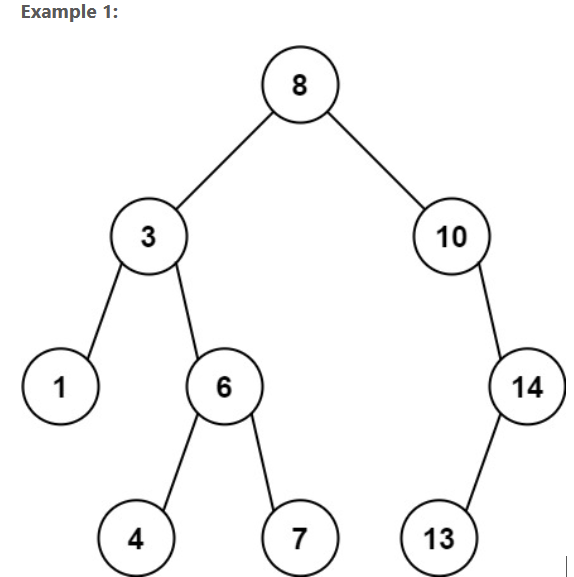

In [ ]:
#below solution gives ans as 3 whereas expected ans = 4 for below tree, so send back both min and max child of the node
class Solution:
    def maxAncestorDiff(self, root: Optional[TreeNode]) -> int:
        max_diff = 0
        
        def dfs(root,max_diff):
            
            if not root:
                return -1, max_diff 
             
            left, max_diff_l = dfs(root.left, max_diff)
            right, max_diff_r = dfs(root.right, max_diff)            
            
            
            
            
            if((left == -1)&(right==-1)): 
                return(root.val, max_diff)
            
            elif((left != -1)&(right==-1)): 
                diff = abs(root.val- left)
                max_diff = max(max_diff_l,max_diff_r, diff)
                return(min(left, root.val), max_diff)
                
            elif((left == -1)&(right !=-1)): 
                diff = abs(root.val- right)
                max_diff = max(max_diff_l,max_diff_r, diff)
                return(min(right, root.val), max_diff)
            
            else: 
                diff = abs(root.val- min(left,right))
                max_diff = max(max_diff_l,max_diff_r, diff)
                
                return(min(left, right, root.val), max_diff)
            
            
        
        left, max_diff_l = dfs(root,0)
        right, max_diff_r = dfs(root, 0) 
        diff = abs(root.val- min(left,right))
        
        return(max( max_diff_l, max_diff_r,diff))
            
            
            
        
        
        

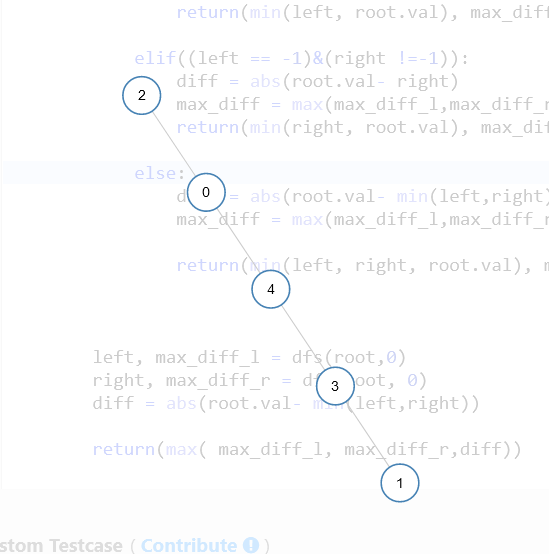

In [ ]:
#this worked
class Solution:
    def maxAncestorDiff(self, root: Optional[TreeNode]) -> int:
        max_diff = 0
        
        def dfs(root,max_diff):
            
            if not root:
                return -1,-1, max_diff 
             
            left_min, left_max, max_diff_l = dfs(root.left, max_diff)
            right_min, right_max, max_diff_r = dfs(root.right, max_diff)            
            
            
            
            
            if((left_min == -1)&(right_min ==-1)): 
                return(root.val,root.val, max_diff)
            
            elif((left_min != -1)&(right_min ==-1)): 
                
                diff1 = abs(root.val- left_min)
                diff2 = abs(root.val- left_max)
                max_diff = max(max_diff_l,max_diff_r, diff1,diff2)
                return(min(left_min, root.val),max(left_max, root.val), max_diff)
                
            elif((left_min == -1)&(right_min !=-1)): 
                
                diff1 = abs(root.val- right_min)
                diff2 = abs(root.val- right_max)
                
                
                max_diff = max(max_diff_l,max_diff_r, diff1, diff2)
                return(min(right_min, root.val),max(right_max, root.val), max_diff)
            
            else: 
                diff1 = abs(root.val- min(left_min,right_min))
                diff2 = abs(root.val- max(left_max,right_max))
                max_diff = max(max_diff_l,max_diff_r, diff1,diff2)
                
                return(min(left_min, right_min, root.val),max(left_max, right_max, root.val), max_diff)
            
            
        
        left_min,left_max, max_diff_l = dfs(root,0)
        right_min,right_max, max_diff_r = dfs(root, 0) 
        
        diff1 = abs(root.val- min(left_min,right_min))
        diff2 = abs(root.val- max(left_max,right_max))
        
        return(max( max_diff_l, max_diff_r,diff1, diff2))
        

##### Diameter of Binary Tree

In [ ]:
# Given the root of a binary tree, return the length of the diameter of the tree.
# The diameter of a binary tree is the length of the longest path between any two nodes in a tree. 

#### This path may or may not pass through the root.####
# In th snip below expected output is 8

# The length of a path between two nodes is represented by the number of edges between them.

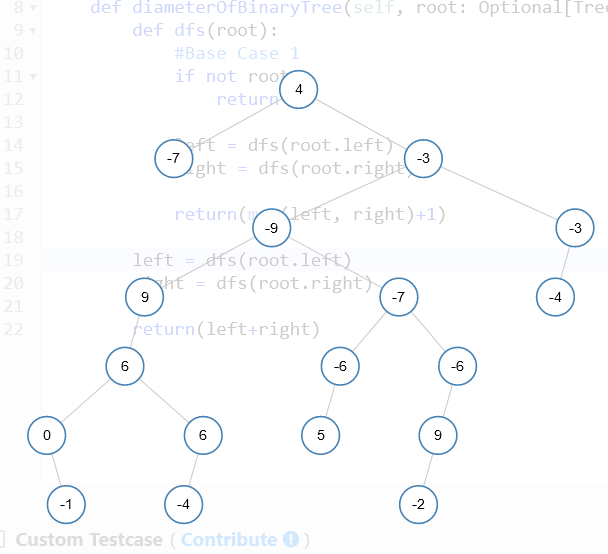

In [6]:
# Input: root = [1,2,3,4,5]
# Output: 3

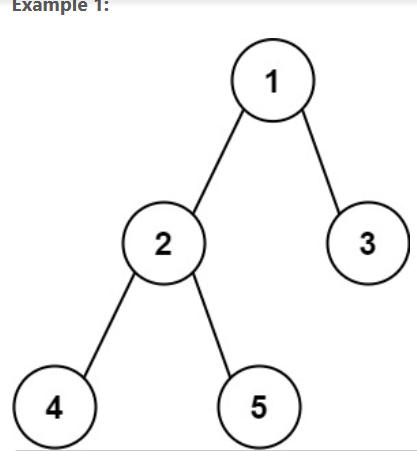

In [7]:
# Input: root = [1,2]
# Output: 1

In [ ]:
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        max_dia = 0
        def dfs(root, max_dia):
            #Base Case 1
            if not root:
                return 0,max_dia
            
            left, max_dia_l = dfs(root.left, max_dia)
            right, max_dia_r = dfs(root.right, max_dia)
            
            max_dia = max(max_dia_l,max_dia_r,(left+right))
            
            return(max(left,right)+1, max_dia)
        
        left, max_dia_l = dfs(root.left, max_dia)
        right,max_dia_r = dfs(root.right, max_dia)
         
        return(max(max_dia_l,max_dia_r,(left+right)))
            
            

##### Lowest Common Ancestor of a Binary Tree

In [ ]:
# https://en.wikipedia.org/wiki/Lowest_common_ancestor

#Note: If you are having trouble understanding the following problem and solution, please do not feel discouraged! The problem was going to be removed from the course as it is significantly more difficult than the other examples we have looked at.
#We have only kept it in the course as a "bonus" since it is a classic problem.
#Bonus example: 236. Lowest Common Ancestor of a Binary Tree
#Given the root of a binary tree and two nodes p and q that are in the tree, 
# return the lowest common ancestor (LCA) of the two nodes. 
# The LCA is the lowest node in the tree that has both p and q as descendants 
# (note: a node is a descendant of itself).


In [20]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        #base case1
        if not root:
            return None
        
        # first case
        if root == p or root == q:
            return root
        
        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)
        
        # second case
        if left and right:
            return root
        
        # third case
        if left:
            return left
        
        return right
    



"""
The ex used for above code looks like:
            0
          /   \
         1     2
       /  \     \
      3    4     5
                  \
                   6

"""

In [30]:
z = Solution()
print(z.lowestCommonAncestor(root, one, two))

##### Tree Visualize

In [82]:
class Treenode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None


class Tree:
    def __init__(self):
        self.root = None
 
 
def height(root):
    if root is None:
        return 0
    return max(height(root.left), height(root.right))+1


def getcol(h):
    if h == 1:
        return 1
    return getcol(h-1) + getcol(h-1) + 1


def printTree(M, root, col, row, height):
    if root is None:
        return
    M[row][col] = root.data
    printTree(M, root.left, col-pow(2, height-2), row+1, height-1)
    printTree(M, root.right, col+pow(2, height-2), row+1, height-1)


def TreePrinter():
    h = height(myTree.root)
    col = getcol(h)
    M = [[0 for _ in range(col)] for __ in range(h)]
    printTree(M, myTree.root, col//2, 0, h)
    for i in M:
        for j in i:
            if j == 0:
                print(" ", end=" ")
            else:
                print(j, end=" ")
        print("")
 
 
myTree = Tree()
myTree.root = Treenode(0)
myTree.root.left = Treenode(1)
myTree.root.right = Treenode(2)
myTree.root.left.left = Treenode(3)
myTree.root.left.right = Treenode(4)

myTree.root.right.right = Treenode(5)
myTree.root.right.right.right = Treenode(6)
TreePrinter()

                              
      1               2       
  3       4               5   
                            6 


#### Breadth First Search (BFS)

While DFS was implemented using a stack (recursion uses a stack under the hood), BFS is implemented iteratively with a queue. You can implement BFS with recursion, but it wouldn't make sense as it's a lot more difficult without any benefit. As such, we will look only at iterative implementations in this course.

When to use BFS vs DFS?

We mentioned earlier that in many problems, it doesn't matter if you choose preorder, inorder, or postorder DFS, the important thing is that you just visit all nodes. If you have a problem like this, then it doesn't matter if you use BFS either, because every "visit" to a node will store sufficient information irrespective of visit order.

Because of this, in terms of binary tree algorithm problems, it is very rare to find a problem that using DFS is "better" than using BFS. However, implementing DFS is usually quicker because it requires less code, and is easier to implement if using recursion, so for problems where BFS/DFS doesn't matter, most people end up using DFS.

On the flip side, there are quite a few problems where using BFS makes way more sense algorithmically than using DFS. Usually, this applies to any problem where we want to handle the nodes according to their level. 

In an interview, you may be asked some trivia regarding BFS vs DFS, such as their drawbacks. The main disadvantage of DFS is that you could end up wasting a lot of time looking for a value. Let's say that you had a huge tree, and you were looking for a value that is stored in the root's right child. If you do DFS prioritizing left before right, then you will search the entire left subtree, which could be hundreds of thousands if not millions of operations. Meanwhile, the node is literally one operation away from the root. The main disadvantage of BFS is that if the node you're searching for is near the bottom, then you will waste a lot of time searching through all the levels to reach the bottom.

##### BFS code implementations

In [ ]:
from collections import deque

def print_all_nodes(root):
    queue = deque([root])
    while queue:
        nodes_in_current_level = len(queue)
        # do some logic here for the current level

        for _ in range(nodes_in_current_level):
            node = queue.popleft()
            
            # do some logic here on the current node
            print(node.val)

            # put the next level onto the queue
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

##### 199. Binary Tree Right Side View

In [1]:
# Given the root of a binary tree, imagine yourself standing on the right side of it. 
# Return the values of the nodes you can see ordered from top to bottom.

In [ ]:
class Solution:
    def rightSideView(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []
        
        ans = []
        queue = deque([root])
        
        while queue:
            current_length = len(queue)
            ans.append(queue[-1].val) # this is the rightmost node for the current level
            
            for _ in range(current_length):
                node = queue.popleft()
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
        
        return ans
        

In [2]:
##### 515. Find Largest Value in Each Tree Row

In [3]:
# Given the root of a binary tree, return an array of the largest value in each row of the tree.


In [ ]:
class Solution:
    def largestValues(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []
        
        ans = []
        queue = deque([root])
        
        while queue:
            
            current_length = len(queue)
            curr_max = float("-inf") # this will store the largest value for the current level
            
            for _ in range(current_length):
                node = queue.popleft()
                curr_max = max(curr_max, node.val)
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            
            ans.append(curr_max)
        
        return ans

##### Deepest Leaves Sum

In [5]:
# Given the root of a binary tree, return the sum of values of its deepest leaves. 

In [7]:
# Input: root = [1,2,3,4,5,null,6,7,null,null,null,null,8]
# Output: 15

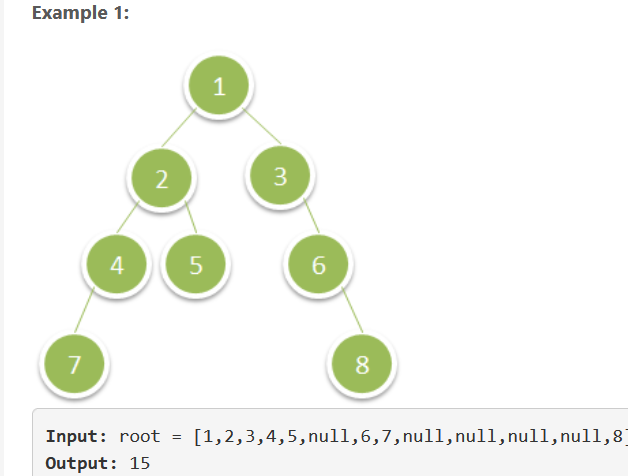

In [ ]:
class Solution:
    def deepestLeavesSum(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        
        queue = deque([root])
        
        while queue:
            queue1 = queue.copy()
            current_level = len(queue)
            
            for _ in range(currnt_level):
                node = queue.popleft()      
                if node.left:
                    queue.append(node.left)
                
                if node.right:
                    queue.append(node.right)
        
        ans = 0
        for i in range(len(queue)):
            ans += queue[i]
        
        return(ans)
                
                    
            
        
        

##### Binary Tree Zigzag Level Order Traversal

In [9]:
# Given the root of a binary tree, return the zigzag level order traversal of its nodes' values.
# (i.e., from left to right, then right to left for the next level and alternate between).


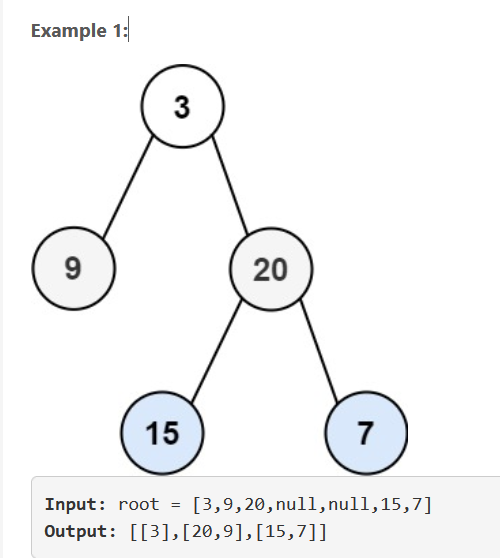

In [ ]:
class Solution:
    def zigzagLevelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root:
            return []
        
        queue = deque([root])
        depth = 0
        ans = []
        while queue:
            
            current_level = len(queue)
            
            if (depth%2==0):
                ans1 = []    
                for i in range(current_level):
                    ans1.append(queue[i].val)
                    
            else:
                ans1 = []    
                for i in range(current_level-1,-1,-1):
                    ans1.append(queue[i].val)
            
            ans.append(ans1)
            depth +=1
            
            for _ in range(current_level):               
                    node = queue.popleft()        
                
                if node.left:
                    queue.append(node.left)
                
                if node.right:
                    queue.append(node.right)
        
        
        return(ans)
            
        
        

#### Binary search trees

A binary search tree (BST) is a type of binary tree. A BST has the following property:

For each node, all values in its left subtree are less than the value in the node, and all values in its right subtree are greater than the value in the node.

This property also implies that values in a BST must be unique.